In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import layers, models

In [21]:
train = pd.read_csv('/content/emnist-balanced-train.csv')
test = pd.read_csv('/content/emnist-balanced-test.csv')

In [22]:
train = train.iloc[:-1, :]
test = test.iloc[:-1, :]

In [23]:
train_labels = train.iloc[:, 0]
train_images = train.iloc[:, 1:]

test_labels = test.iloc[:, 0]
test_images = test.iloc[:,1:]

In [24]:
# train_images.describe()

In [25]:
train_labels = np.asarray(train_labels)
train_images = np.asarray(train_images)

test_labels = np.asarray(test_labels)
test_images = np.asarray(test_images)

In [26]:
print(f"train --> {np.min(train_images)}\t{np.max(train_images)}\ntest --> {np.min(test_images)}\t{np.max(test_images)}")

train --> 0.0	255.0
test --> 0.0	255.0


In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [28]:
print(f"train --> {np.min(train_images)}\t{np.max(train_images)}\ntest --> {np.min(test_images)}\t{np.max(test_images)}")

train --> 0.0	1.0
test --> 0.0	1.0


In [29]:
to_char = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j',
    20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't',
    30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z',
    36: 'A', 37: 'B', 38: 'C', 39: 'D', 40: 'E', 41: 'F', 42: 'G', 43: 'H', 44: 'I', 45: 'J',
    46: 'K', 47: 'L', 48: 'M', 49: 'N', 50: 'O', 51: 'P', 52: 'Q', 53: 'R', 54: 'S', 55: 'T',
    56: 'U', 57: 'V', 58: 'W', 59: 'X', 60: 'Y', 61: 'Z'
}

In [30]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [31]:
train_images.shape

(8112, 28, 28, 1)

In [32]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(28, 28, 1)),
    keras.layers.RandomZoom(0.1)
])

In [33]:
model = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(28, 28, 1)),
    keras.layers.RandomZoom(0.1),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 1)),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(to_char), activation='softmax')
])

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [36]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=64)

Epoch 1/20
102/102 [==============================] - 28s 250ms/step - loss: 2.9153 - accuracy: 0.2245 - val_loss: 1.7851 - val_accuracy: 0.4726
Epoch 2/20
102/102 [==============================] - 14s 134ms/step - loss: 1.5005 - accuracy: 0.5452 - val_loss: 1.2430 - val_accuracy: 0.6180
Epoch 3/20
102/102 [==============================] - 15s 147ms/step - loss: 1.1291 - accuracy: 0.6463 - val_loss: 0.9886 - val_accuracy: 0.6858
Epoch 4/20
102/102 [==============================] - 16s 159ms/step - loss: 0.9107 - accuracy: 0.7101 - val_loss: 0.9433 - val_accuracy: 0.6981
Epoch 5/20
102/102 [==============================] - 14s 136ms/step - loss: 0.7966 - accuracy: 0.7396 - val_loss: 0.8454 - val_accuracy: 0.7381
Epoch 6/20
102/102 [==============================] - 14s 134ms/step - loss: 0.7069 - accuracy: 0.7676 - val_loss: 0.8290 - val_accuracy: 0.7381
Epoch 7/20
102/102 [==============================] - 20s 193ms/step - loss: 0.6486 - accuracy: 0.7881 - val_loss: 0.8152 - val_ac

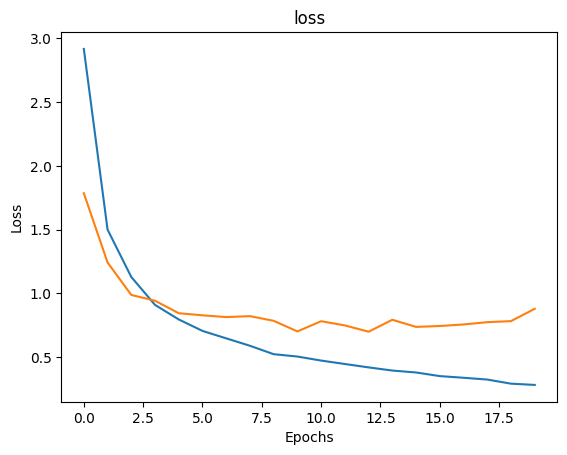

In [37]:
plt.plot(range(20), history.history['loss'])
plt.plot(range(20), history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

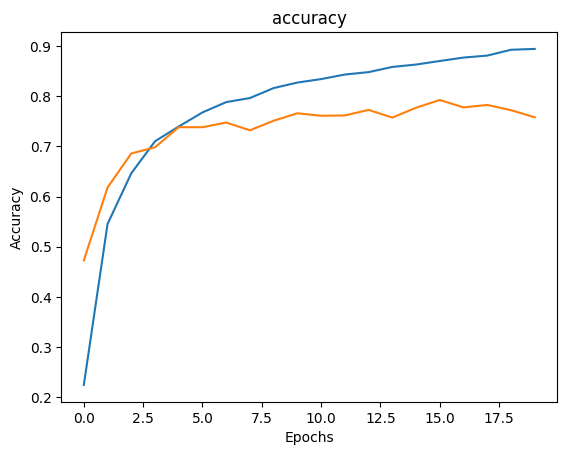

In [38]:
plt.plot(range(20), history.history['accuracy'])
plt.plot(range(20), history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('accuracy')
plt.show()

In [39]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 7s 28ms/step - loss: 0.9039 - accuracy: 0.7496
test loss : 0.9039299488067627
test accuracy : 0.7495990991592407


In [40]:
model2 = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(to_char), activation='softmax')
])

In [41]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)        

In [43]:
history2 = model2.fit(train_images, train_labels, validation_split = 0.2, epochs=20, batch_size=64)

Epoch 1/20
102/102 [==============================] - 18s 161ms/step - loss: 3.2391 - accuracy: 0.1476 - val_loss: 2.0519 - val_accuracy: 0.3752
Epoch 2/20
102/102 [==============================] - 22s 215ms/step - loss: 1.6883 - accuracy: 0.4731 - val_loss: 1.2834 - val_accuracy: 0.6057
Epoch 3/20
102/102 [==============================] - 29s 283ms/step - loss: 1.2276 - accuracy: 0.6080 - val_loss: 1.0664 - val_accuracy: 0.6574
Epoch 4/20
102/102 [==============================] - 17s 166ms/step - loss: 1.0278 - accuracy: 0.6679 - val_loss: 1.0232 - val_accuracy: 0.6661
Epoch 5/20
102/102 [==============================] - 17s 165ms/step - loss: 0.8816 - accuracy: 0.7081 - val_loss: 0.8464 - val_accuracy: 0.7135
Epoch 6/20
102/102 [==============================] - 17s 164ms/step - loss: 0.7961 - accuracy: 0.7319 - val_loss: 0.7871 - val_accuracy: 0.7412
Epoch 7/20
102/102 [==============================] - 18s 173ms/step - loss: 0.7244 - accuracy: 0.7559 - val_loss: 0.8196 - val_ac

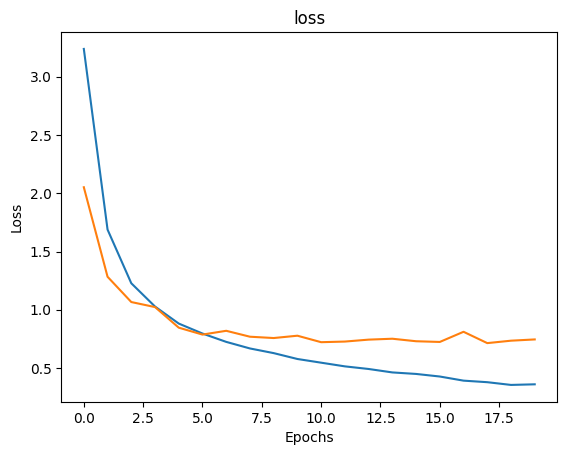

In [44]:
plt.plot(range(20), history2.history['loss'])
plt.plot(range(20), history2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

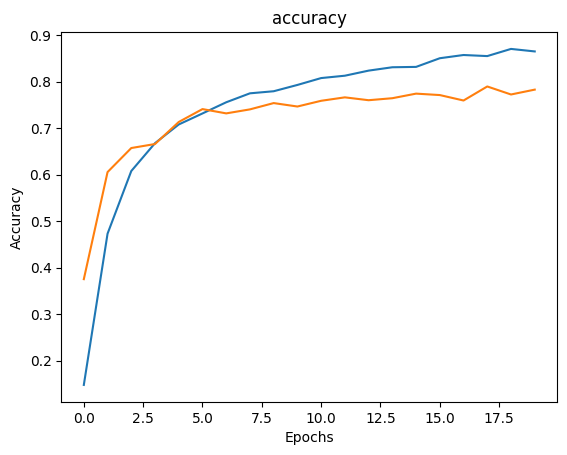

In [45]:
plt.plot(range(20), history2.history['accuracy'])
plt.plot(range(20), history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('accuracy')
plt.show()

In [56]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 5s 19ms/step - loss: 0.7504 - accuracy: 0.7797
test loss : 0.7503710985183716
test accuracy : 0.7796965837478638


In [76]:
history2_2 = model2.fit(train_images, train_labels, validation_split = 0.2, epochs=30, batch_size=64)

Epoch 1/30
102/102 [==============================] - 18s 180ms/step - loss: 0.3385 - accuracy: 0.8750 - val_loss: 0.7223 - val_accuracy: 0.7911
Epoch 2/30
102/102 [==============================] - 17s 163ms/step - loss: 0.3326 - accuracy: 0.8776 - val_loss: 0.7206 - val_accuracy: 0.7856
Epoch 3/30
102/102 [==============================] - 16s 159ms/step - loss: 0.3178 - accuracy: 0.8832 - val_loss: 0.7598 - val_accuracy: 0.7689
Epoch 4/30
102/102 [==============================] - 17s 163ms/step - loss: 0.2874 - accuracy: 0.8897 - val_loss: 0.8116 - val_accuracy: 0.7763
Epoch 5/30
102/102 [==============================] - 16s 162ms/step - loss: 0.2918 - accuracy: 0.8898 - val_loss: 0.8365 - val_accuracy: 0.7733
Epoch 6/30
102/102 [==============================] - 18s 178ms/step - loss: 0.2730 - accuracy: 0.8915 - val_loss: 0.8178 - val_accuracy: 0.7671
Epoch 7/30
102/102 [==============================] - 17s 163ms/step - loss: 0.2803 - accuracy: 0.8907 - val_loss: 0.7972 - val_ac

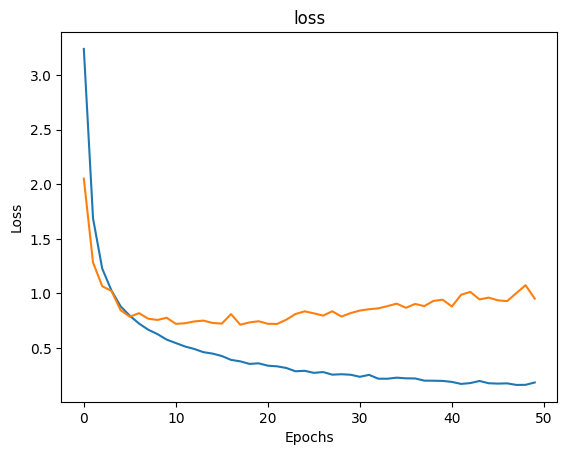

In [77]:
plt.plot(range(50), history2.history['loss']+history2_2.history['loss'])
plt.plot(range(50), history2.history['val_loss']+history2_2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

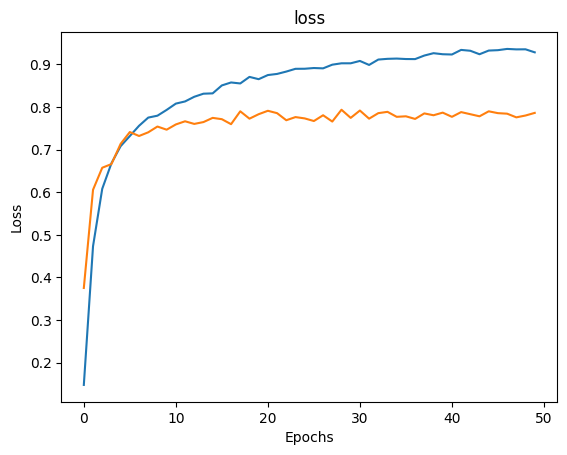

In [78]:
plt.plot(range(50), history2.history['accuracy']+history2_2.history['accuracy'])
plt.plot(range(50), history2.history['val_accuracy']+history2_2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

In [79]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 6s 25ms/step - loss: 0.9242 - accuracy: 0.7851
test loss : 0.9242321848869324
test accuracy : 0.7851239442825317


In [46]:
model3 = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(to_char), activation='softmax')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 128)        

In [48]:
history3 = model3.fit(train_images, train_labels, validation_split = 0.2, epochs=20, batch_size=64)

Epoch 1/20
102/102 [==============================] - 16s 143ms/step - loss: 3.7765 - accuracy: 0.0489 - val_loss: 3.1000 - val_accuracy: 0.1602
Epoch 2/20
102/102 [==============================] - 11s 111ms/step - loss: 2.6548 - accuracy: 0.2329 - val_loss: 1.9661 - val_accuracy: 0.4097
Epoch 3/20
102/102 [==============================] - 13s 122ms/step - loss: 2.1058 - accuracy: 0.3524 - val_loss: 1.6472 - val_accuracy: 0.4960
Epoch 4/20
102/102 [==============================] - 13s 126ms/step - loss: 1.8658 - accuracy: 0.4125 - val_loss: 1.4333 - val_accuracy: 0.5582
Epoch 5/20
102/102 [==============================] - 13s 129ms/step - loss: 1.7499 - accuracy: 0.4403 - val_loss: 1.3194 - val_accuracy: 0.5866
Epoch 6/20
102/102 [==============================] - 13s 127ms/step - loss: 1.6283 - accuracy: 0.4788 - val_loss: 1.2124 - val_accuracy: 0.6352
Epoch 7/20
102/102 [==============================] - 13s 127ms/step - loss: 1.5252 - accuracy: 0.5032 - val_loss: 1.1830 - val_ac

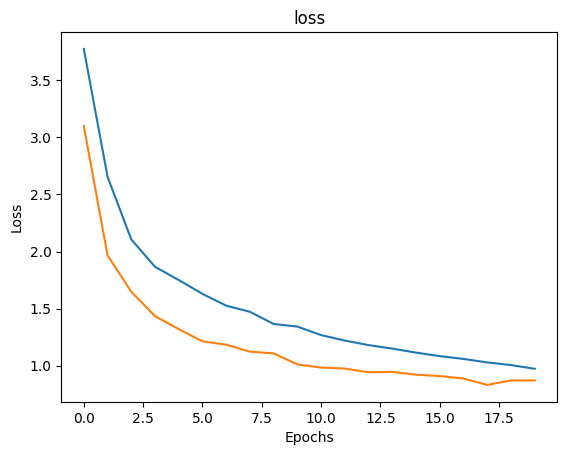

In [49]:
plt.plot(range(20), history3.history['loss'])
plt.plot(range(20), history3.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

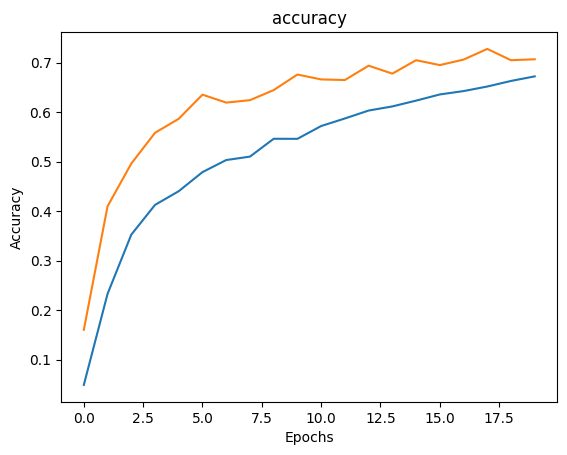

In [50]:
plt.plot(range(20), history3.history['accuracy'])
plt.plot(range(20), history3.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('accuracy')
plt.show()

In [57]:
test_loss, test_accuracy = model3.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 6s 22ms/step - loss: 0.9142 - accuracy: 0.6999
test loss : 0.9141764044761658
test accuracy : 0.6998890042304993


In [60]:
history3_2 = model3.fit(train_images, train_labels, validation_split = 0.2, epochs=30, batch_size=64)

Epoch 1/30
102/102 [==============================] - 15s 145ms/step - loss: 0.7848 - accuracy: 0.7248 - val_loss: 0.8271 - val_accuracy: 0.7363
Epoch 2/30
102/102 [==============================] - 12s 121ms/step - loss: 0.7758 - accuracy: 0.7295 - val_loss: 0.7904 - val_accuracy: 0.7375
Epoch 3/30
102/102 [==============================] - 17s 168ms/step - loss: 0.7689 - accuracy: 0.7234 - val_loss: 0.7910 - val_accuracy: 0.7369
Epoch 4/30
102/102 [==============================] - 13s 125ms/step - loss: 0.7539 - accuracy: 0.7379 - val_loss: 0.7707 - val_accuracy: 0.7486
Epoch 5/30
102/102 [==============================] - 12s 123ms/step - loss: 0.7376 - accuracy: 0.7391 - val_loss: 0.7755 - val_accuracy: 0.7461
Epoch 6/30
102/102 [==============================] - 11s 104ms/step - loss: 0.7418 - accuracy: 0.7400 - val_loss: 0.8020 - val_accuracy: 0.7523
Epoch 7/30
102/102 [==============================] - 12s 118ms/step - loss: 0.7288 - accuracy: 0.7477 - val_loss: 0.7825 - val_ac

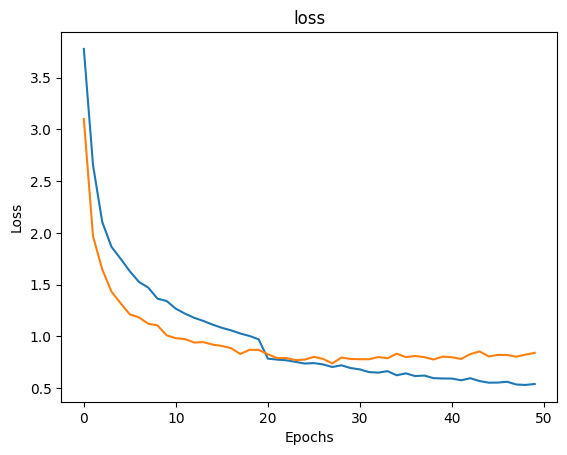

In [73]:
plt.plot(range(50), history3.history['loss']+history3_2.history['loss'])
plt.plot(range(50), history3.history['val_loss']+history3_2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

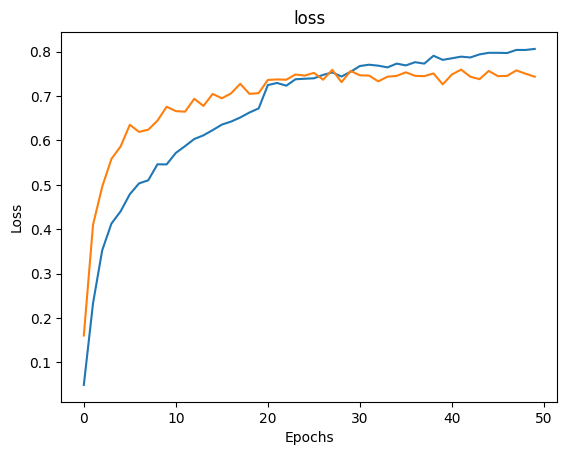

In [74]:
plt.plot(range(50), history3.history['accuracy']+history3_2.history['accuracy'])
plt.plot(range(50), history3.history['val_accuracy']+history3_2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

In [75]:
test_loss, test_accuracy = model3.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 5s 18ms/step - loss: 0.8528 - accuracy: 0.7448
test loss : 0.852756142616272
test accuracy : 0.7447884678840637


In [51]:
# Define the model
model4 = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(62, activation='softmax')  # 62 classes in EMNIST-balanced
])

# Compile the model
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

In [53]:
history4 = model4.fit(train_images, train_labels, validation_split=0.2, epochs=20, batch_size=64)

Epoch 1/20
102/102 [==============================] - 54s 479ms/step - loss: 2.5254 - accuracy: 0.3746 - val_loss: 7.3383 - val_accuracy: 0.0222
Epoch 2/20
102/102 [==============================] - 44s 436ms/step - loss: 1.0954 - accuracy: 0.6602 - val_loss: 8.2542 - val_accuracy: 0.0222
Epoch 3/20
102/102 [==============================] - 45s 439ms/step - loss: 0.8360 - accuracy: 0.7306 - val_loss: 7.2636 - val_accuracy: 0.0333
Epoch 4/20
102/102 [==============================] - 47s 463ms/step - loss: 0.6814 - accuracy: 0.7790 - val_loss: 3.2961 - val_accuracy: 0.2612
Epoch 5/20
102/102 [==============================] - 47s 456ms/step - loss: 0.5954 - accuracy: 0.8049 - val_loss: 1.8443 - val_accuracy: 0.5188
Epoch 6/20
102/102 [==============================] - 45s 437ms/step - loss: 0.5522 - accuracy: 0.8148 - val_loss: 0.7478 - val_accuracy: 0.7770
Epoch 7/20
102/102 [==============================] - 44s 436ms/step - loss: 0.4888 - accuracy: 0.8357 - val_loss: 0.5421 - val_ac

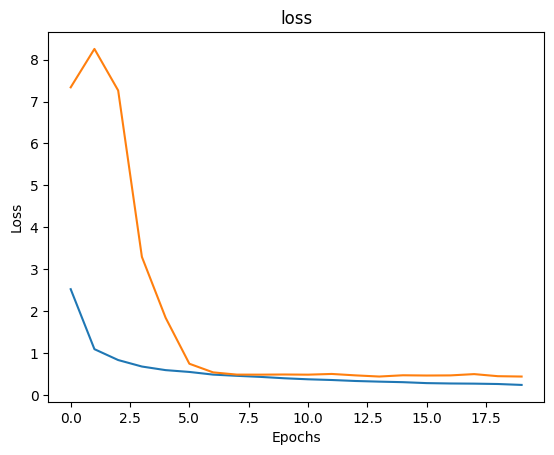

In [54]:
plt.plot(range(20), history4.history['loss'])
plt.plot(range(20), history4.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

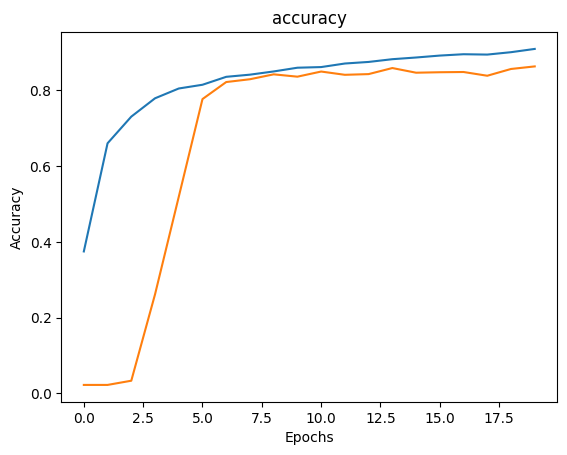

In [55]:
plt.plot(range(20), history4.history['accuracy'])
plt.plot(range(20), history4.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('accuracy')
plt.show()

In [58]:
test_loss, test_accuracy = model4.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 13s 53ms/step - loss: 0.5033 - accuracy: 0.8499
test loss : 0.5032956600189209
test accuracy : 0.8498828411102295


In [64]:
history4_2 = model4.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=64)

Epoch 1/30
102/102 [==============================] - 46s 445ms/step - loss: 0.2305 - accuracy: 0.9095 - val_loss: 0.4593 - val_accuracy: 0.8583
Epoch 2/30
102/102 [==============================] - 45s 438ms/step - loss: 0.2236 - accuracy: 0.9152 - val_loss: 0.4594 - val_accuracy: 0.8669
Epoch 3/30
102/102 [==============================] - 45s 446ms/step - loss: 0.2135 - accuracy: 0.9165 - val_loss: 0.4743 - val_accuracy: 0.8626
Epoch 4/30
102/102 [==============================] - 45s 443ms/step - loss: 0.2113 - accuracy: 0.9191 - val_loss: 0.5467 - val_accuracy: 0.8410
Epoch 5/30
102/102 [==============================] - 45s 443ms/step - loss: 0.2113 - accuracy: 0.9174 - val_loss: 0.5090 - val_accuracy: 0.8546
Epoch 6/30
102/102 [==============================] - 47s 462ms/step - loss: 0.1962 - accuracy: 0.9257 - val_loss: 0.4755 - val_accuracy: 0.8601
Epoch 7/30
102/102 [==============================] - 45s 440ms/step - loss: 0.1914 - accuracy: 0.9279 - val_loss: 0.5180 - val_ac

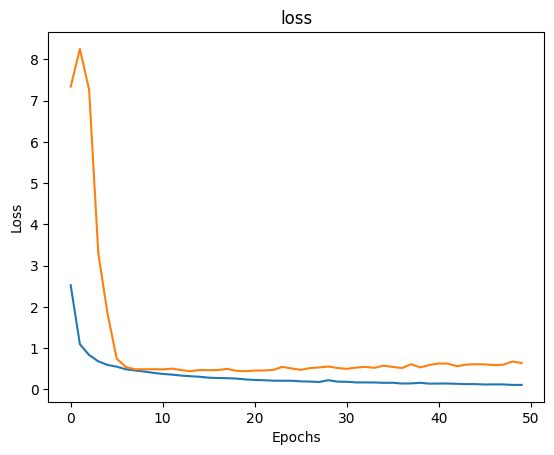

In [71]:
plt.plot(range(50), history4.history['loss']+history4_2.history['loss'])
plt.plot(range(50), history4.history['val_loss']+history4_2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

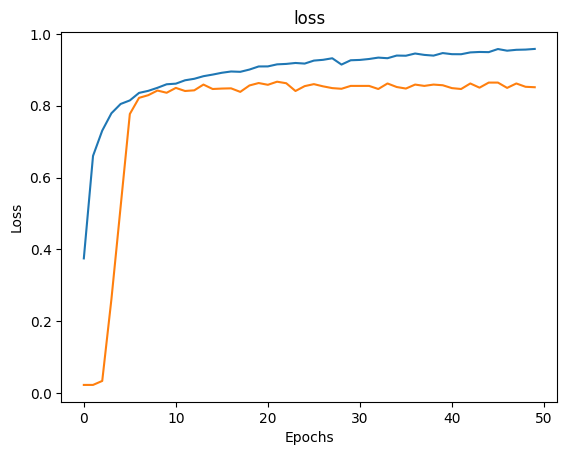

In [72]:
plt.plot(range(50), history4.history['accuracy']+history4_2.history['accuracy'])
plt.plot(range(50), history4.history['val_accuracy']+history4_2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

In [67]:
test_loss, test_accuracy = model4.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 15s 61ms/step - loss: 0.7128 - accuracy: 0.8469
test loss : 0.7128074169158936
test accuracy : 0.8469223976135254


In [80]:
model5 = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(to_char), activation='softmax')
])

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 28, 28, 1)         0         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [82]:
history5 = model5.fit(train_images, train_labels, validation_split = 0.2, epochs=50, batch_size=64)

Epoch 1/50
102/102 [==============================] - 36s 331ms/step - loss: 3.4870 - accuracy: 0.0940 - val_loss: 2.4343 - val_accuracy: 0.3038
Epoch 2/50
102/102 [==============================] - 23s 228ms/step - loss: 1.8460 - accuracy: 0.4395 - val_loss: 1.3949 - val_accuracy: 0.5687
Epoch 3/50
102/102 [==============================] - 24s 235ms/step - loss: 1.2965 - accuracy: 0.5748 - val_loss: 1.1464 - val_accuracy: 0.6272
Epoch 4/50
102/102 [==============================] - 25s 245ms/step - loss: 1.0360 - accuracy: 0.6546 - val_loss: 0.9858 - val_accuracy: 0.6827
Epoch 5/50
102/102 [==============================] - 24s 239ms/step - loss: 0.8690 - accuracy: 0.6987 - val_loss: 0.8332 - val_accuracy: 0.7246
Epoch 6/50
102/102 [==============================] - 23s 224ms/step - loss: 0.7638 - accuracy: 0.7391 - val_loss: 0.8655 - val_accuracy: 0.7104
Epoch 7/50
102/102 [==============================] - 25s 244ms/step - loss: 0.7044 - accuracy: 0.7581 - val_loss: 0.8088 - val_ac

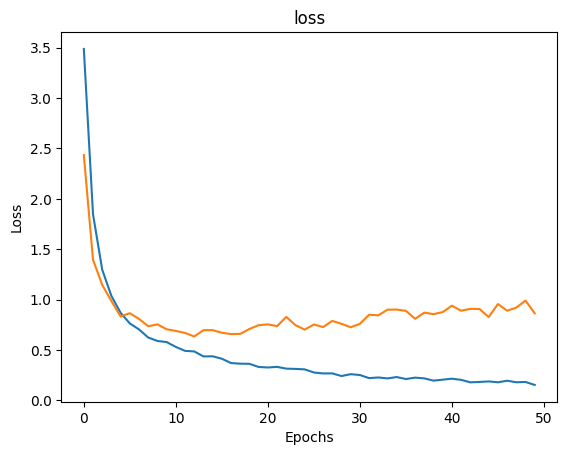

In [83]:
plt.plot(range(50), history5.history['loss'])
plt.plot(range(50), history5.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

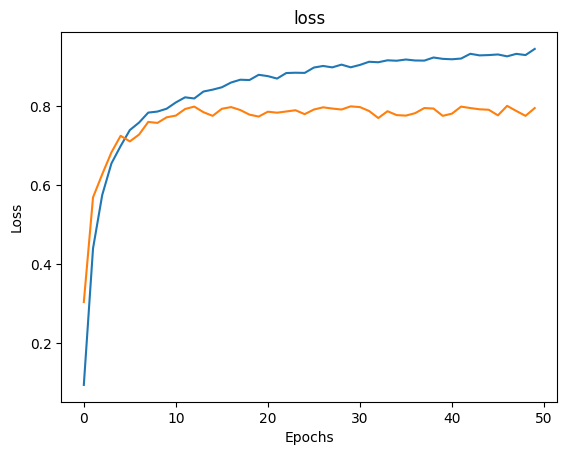

In [85]:
plt.plot(range(50), history5.history['accuracy'])
plt.plot(range(50), history5.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('loss')
plt.show()

In [84]:
test_loss, test_accuracy = model5.evaluate(test_images, test_labels)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

254/254 [==============================] - 15s 57ms/step - loss: 0.9297 - accuracy: 0.7887
test loss : 0.92972731590271
test accuracy : 0.7887011170387268
